Load the Dataset

In [ ]:
"/content/drive/MyDrive/ Dataseekho Bootcamp /heart dataset.csv"

'/content/drive/MyDrive/ Dataseekho Bootcamp /heart dataset.csv'

In [ ]:
import pandas as pd

# Replace 'your_file_path.csv' with the actual path to your CSV file
file_path = '/content/drive/MyDrive/ Dataseekho Bootcamp /heart dataset.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


Exploratory Data Analysis

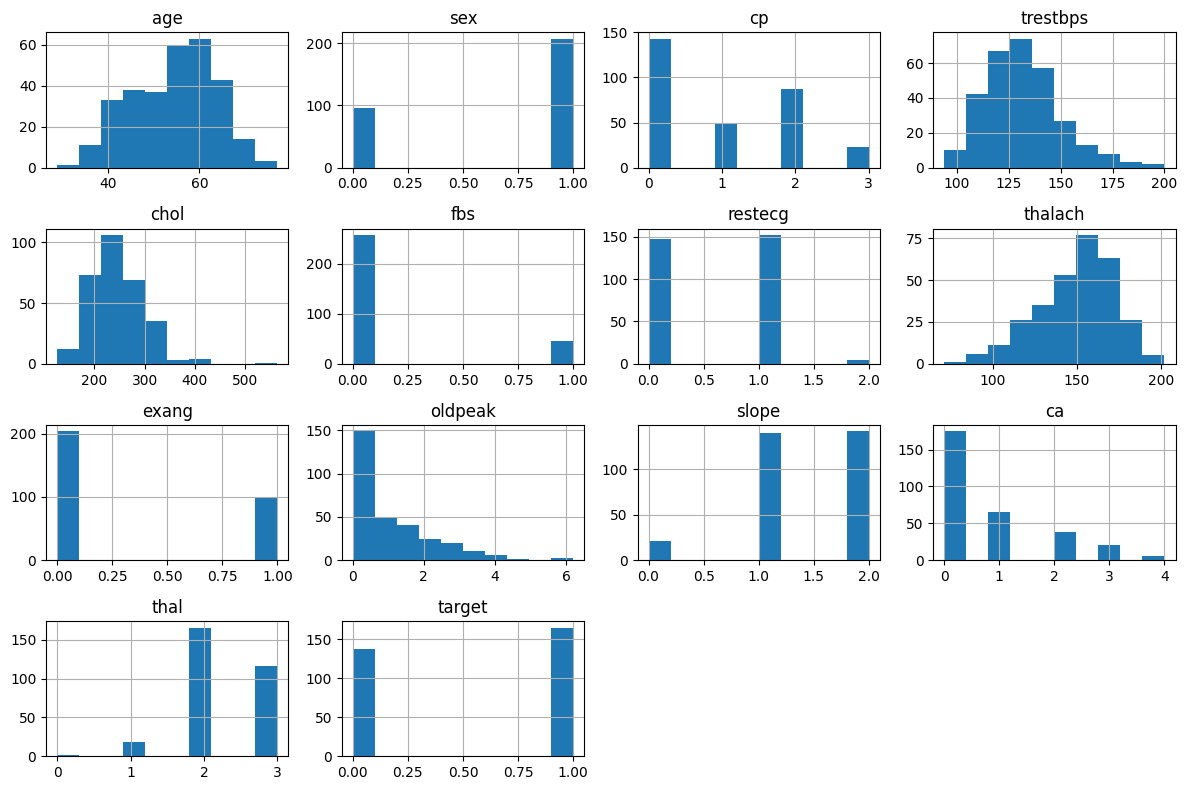

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df'

# Generate histograms for numerical columns
df.hist(bins=10, figsize=(12, 8))
plt.tight_layout()
plt.show()

# Example to generate a histogram for a specific column:
# plt.hist(df['age'], bins=10)
# plt.xlabel('Age')
# plt.ylabel('Frequency')
# plt.title('Histogram of Age')
# plt.show()

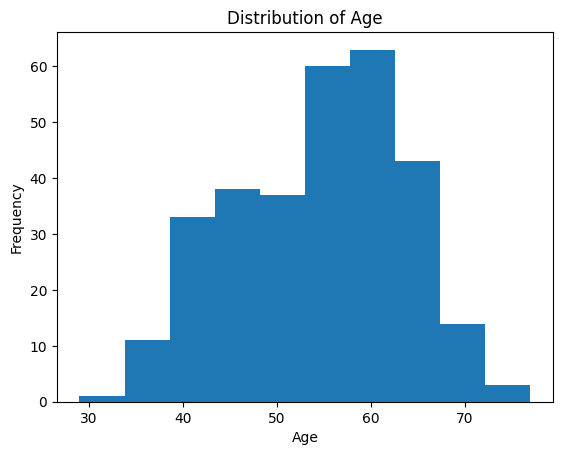

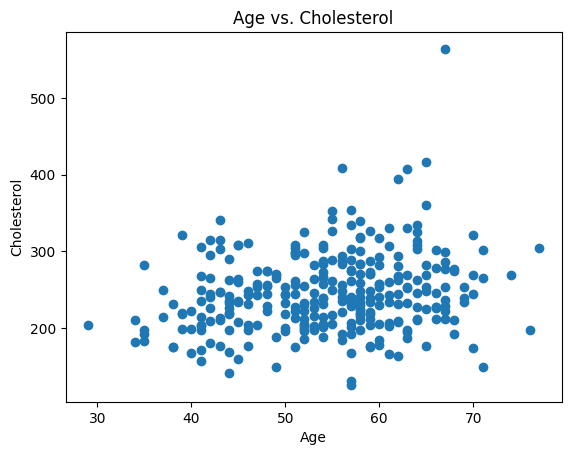

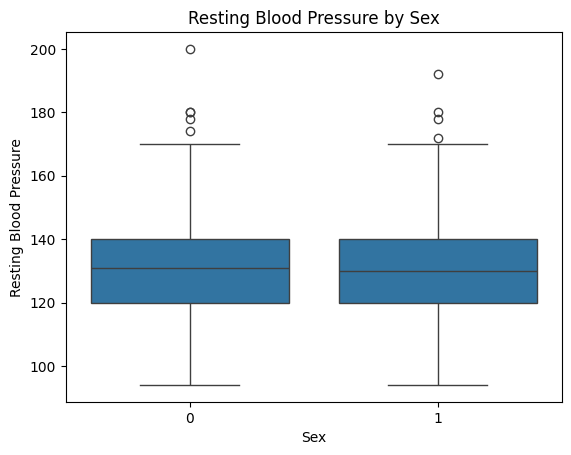

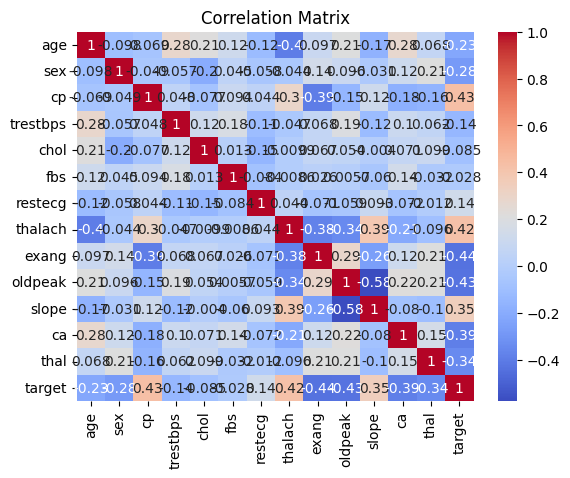

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have your DataFrame 'df' loaded as shown in your previous code

# Example: Histogram of 'age'
plt.hist(df['age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

# Example: Scatter plot of 'age' vs 'chol' (cholesterol)
plt.scatter(df['age'], df['chol'])
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Age vs. Cholesterol')
plt.show()


# Example: Box plot of 'trestbps' (resting blood pressure) by 'sex'
sns.boxplot(x='sex', y='trestbps', data=df)
plt.xlabel('Sex')
plt.ylabel('Resting Blood Pressure')
plt.title('Resting Blood Pressure by Sex')
plt.show()


# Example: Correlation matrix heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Data Preprocessing and Data Splitting

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# Assuming your data is in a variable called 'data' as per the Global Variables
df = data.copy()  # Create a copy to avoid modifying the original DataFrame

# 1. Handling Missing Values (if any)
# Check for missing values in each column
print(df.isnull().sum())

# If there are missing values, you can handle them in different ways:
# - Dropping rows with missing values: df.dropna(inplace=True)
# - Filling missing values with mean, median, or mode: df['column_name'].fillna(df['column_name'].mean(), inplace=True)


# 2. Data Type Conversion (if needed)
# Check the data types of each column
print(df.dtypes)

# Convert columns to appropriate data types if necessary
# For example, if 'age' is an object type and should be numerical:
# df['age'] = pd.to_numeric(df['age'])


# 3. Feature Scaling
# Scaling numerical features to a specific range (e.g., 0-1 or -1 to 1)
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']  # Add other numerical columns

# Choose a scaler (StandardScaler for standardization, MinMaxScaler for normalization)
scaler = StandardScaler()
# scaler = MinMaxScaler()

# Fit and transform the scaler on the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])


# 4. Handling Categorical Features (if any)
# Convert categorical features into numerical representations using one-hot encoding or label encoding
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'] # Add other categorical columns

# Example using one-hot encoding:
df = pd.get_dummies(df, columns=categorical_features, drop_first=True) # drop_first avoids multicollinearity


# 5. Feature Engineering (if needed)
# Create new features from existing ones that might be more informative
# Example: Calculate body mass index (BMI) using weight and height
# df['bmi'] = df['weight'] / (df['height'] ** 2)

# 6. Data Splitting (if you're building a model)
# Split the data into training and testing sets

X = df.drop('target', axis=1)  # Assuming 'target' is the column with the target variable
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Print the updated DataFrame info
print(df.info())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        303 non-null    float64
 1   trestbps   303 non-null    float64
 2   chol       303 non-null    float64
 3   thalach    303 non-null    float64
 4   oldpeak    303 non-null    float64
 5   target     303 non-null    int64  
 6   sex_1      303 non-null    bool   
 7   cp_1       303 non-null    

Model Training and Evaluation

a. Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have already performed the data preprocessing steps
# (handling missing values, scaling, encoding, etc.) and split the data into X_train, X_test, y_train, y_test

# Initialize the SVM model
svm_model = SVC(kernel='linear', C=1)  # You can change the kernel and C parameter as needed

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8688524590163934
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



b. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Assuming you have already performed the data preprocessing steps
# (handling missing values, scaling, encoding, etc.) and split the data into X_train, X_test, y_train, y_test

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters as needed

# Train the model on the training data
dt_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = dt_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7213114754098361
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.79      0.73        29
           1       0.78      0.66      0.71        32

    accuracy                           0.72        61
   macro avg       0.73      0.72      0.72        61
weighted avg       0.73      0.72      0.72        61



Model Comparison

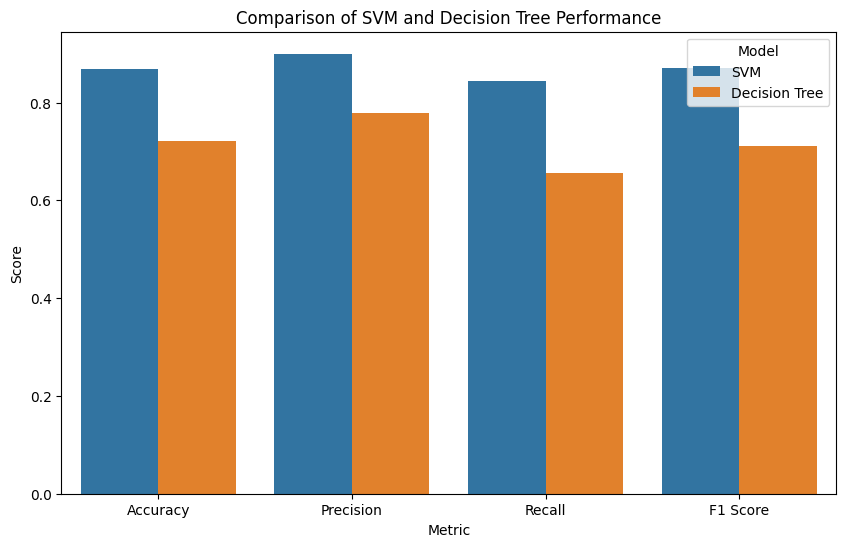

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have already performed the data preprocessing steps
# (handling missing values, scaling, encoding, etc.) and split the data
# into X_train, X_test, y_train, y_test as in your previous code.

# Train and evaluate the SVM model
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Calculate SVM metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

# Train and evaluate the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Calculate Decision Tree metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Create a DataFrame for comparison
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'SVM': [accuracy_svm, precision_svm, recall_svm, f1_svm],
    'Decision Tree': [accuracy_dt, precision_dt, recall_dt, f1_dt]
})

# Melt the DataFrame for better visualization
metrics_df_melted = pd.melt(metrics_df, id_vars='Metric', var_name='Model', value_name='Value')

# Create a bar plot for comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', hue='Model', data=metrics_df_melted)
plt.title('Comparison of SVM and Decision Tree Performance')
plt.ylabel('Score')
plt.legend(title='Model')
plt.show()